# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.combine import SMOTEENN


# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


In [5]:
#Creating instance for label encoder 
l_encoder= LabelEncoder()

#Fitting & encoding columns with label encoder
l_encoder.fit(df["homeowner"])
df["homeowner"] = l_encoder.transform(df["homeowner"])
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,1,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,1,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,2,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,1,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,0,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [6]:
# Create our features
X = df.drop(columns="loan_status")

# Create our target
y = df["loan_status"]

In [7]:
X.describe()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,0.606144,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,0.667811,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,0.000000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,0.000000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,1.000000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,1.000000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,2.000000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [9]:
# Check the balance of our target values
y.value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [11]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [13]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [15]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Simple Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [17]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9520479254722232

In [18]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  563,    56],
       [  102, 18663]], dtype=int64)

In [19]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      0.91      0.99      0.88      0.95      0.90       619
   low_risk       1.00      0.99      0.91      1.00      0.95      0.91     18765

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [21]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'low_risk': 56271, 'high_risk': 56271})

In [23]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [25]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.9520479254722232

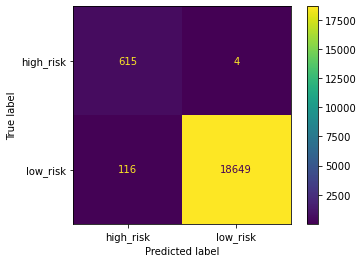

In [27]:
# Display the confusion matrix
y_pred = model.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(con_matrix, display_labels=model.classes_).plot()

In [29]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [32]:
# Resample the training data with SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
    X_train, y_train
)
# View the count of target classes with Counter
Counter(y_resampled)

Counter({'low_risk': 56271, 'high_risk': 56271})

In [33]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [34]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9936781215845847

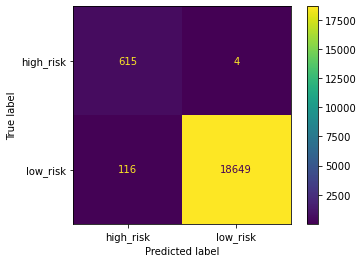

In [35]:
# Display the confusion matrix
y_pred = model.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(con_matrix, display_labels=model.classes_).plot()

In [36]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [41]:
# Resample the data using the ClusterCentroids resampler
clu_cen = ClusterCentroids(random_state=1)
X_resampled, y_resampled = clu_cen.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'high_risk': 1881, 'low_risk': 1881})

In [42]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [43]:
# Calculate the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.9936781215845847

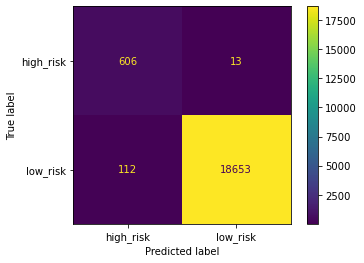

In [44]:
# Display the confusion matrix
y_pred = model.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(con_matrix, display_labels=model.classes_).plot()

In [45]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.98      0.99      0.91      0.99      0.97       619
   low_risk       1.00      0.99      0.98      1.00      0.99      0.97     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.97     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [46]:
# Resample the training data with SMOTEENN
smote_n = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_n.fit_resample(X, y)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'high_risk': 74120, 'low_risk': 74577})

In [47]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [48]:
# Calculate the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9935715401830394

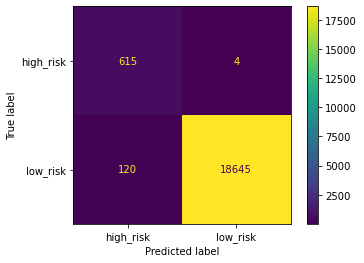

In [49]:
# Display the confusion matrix
y_pred = model.predict(X_test)
con_matrix= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(con_matrix, display_labels=model.classes_).plot()

In [50]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   SMOTE and Cluster Centroids models have the best balance accuracy scores. 

2. Which model had the best recall score?

    SMOTE & SMOTEEN have the best recall scores. 

3. Which model had the best geometric mean score?

    SMOTE, SMOTEENN, and Naive Random Oversampliong had the same geometric mean score. 
